# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/house_prices.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/house_prices.parquet')

In [5]:
y_train = train.SalePrice
X_train = train.drop(columns=['SalePrice'])

In [6]:
y_validation = validation.SalePrice
X_validation = validation.drop(columns=['SalePrice'])

Despite decision trees don't need scaled values, we are going to work with the target scaled, instead of predicting dollars, we are predicting thousands of dollars as we did in the linear regression, and this way we can compare RSME.

In [7]:
y_train_scaled = y_train/1000
y_validation_scaled = y_validation/1000

In [8]:
exploratory_depths = [1, 5, 10, 15, 20, 25, 30, 40, 50, 60]

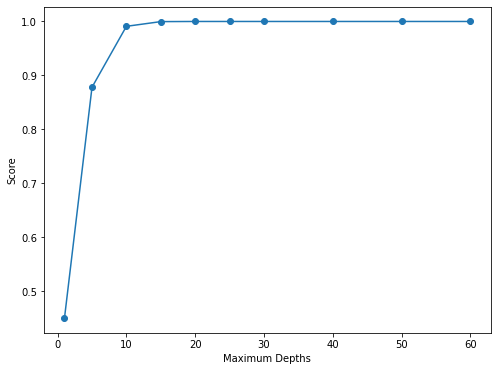

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(exploratory_depths, [DecisionTreeRegressor(max_depth=i).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], marker= 'o')
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.show()

In [10]:
max_depth = [1, 2, 3, 4, 5, 6, 8, 10, 15, 20]

In [11]:
models_list = [DecisionTreeRegressor(max_depth = i) for i in max_depth]
names_list = ['DT_'+str(i) for i in max_depth]

In [12]:
metrics = regression(models_list, names_list, '../../../data/metrics/house_prices/decision_tree.csv', X_train, y_train_scaled, X_validation, y_validation_scaled, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
DT_1,0.024932,58.562035,60.979366,4.127813
DT_2,0.035904,47.881611,49.023374,2.384554
DT_3,0.028923,39.117978,46.427664,18.686259
DT_4,0.033910,32.758839,41.198338,25.762510
DT_5,0.033910,27.585779,39.919127,44.709079
DT_6,0.037897,22.468882,39.648388,76.459102
DT_8,0.043883,13.487922,38.032114,181.971643
DT_10,0.057846,7.492599,40.991935,447.098983
DT_15,0.069324,1.332988,36.128740,2610.357415
DT_20,0.071807,0.054611,43.951213,80380.392891


We are going to choose **DT_5** because in the linear regressions we chose a model with similar delta and it gives one of the bests RMSE in validation.

In [13]:
test =  pd.read_parquet('../../../data/model_input/test_sets/house_prices.parquet')

In [14]:
y_test = test.SalePrice
X_test = test.drop(columns=['SalePrice'])

In [15]:
retrain = pd.concat([train, validation])

In [17]:
y_retrain = retrain.SalePrice
X_retrain = retrain.drop(columns=['SalePrice'])

In [18]:
y_retrain_scaled = y_retrain/1000
y_test_scaled = y_test/1000

In [35]:
model = DecisionTreeRegressor(max_depth=5).fit(X_retrain, y_retrain_scaled)

In [36]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test_scaled, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 36.7113


In fact, retraining it we get better results

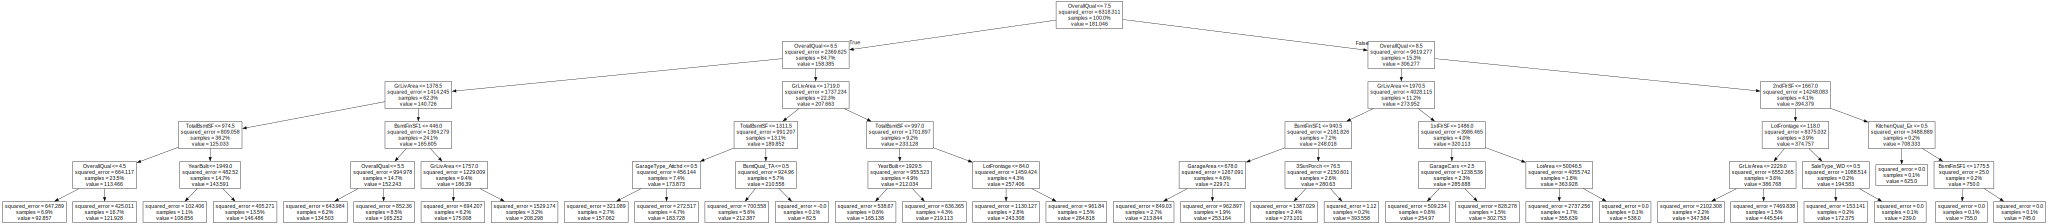

In [37]:
finaltree = export_graphviz(model, out_file=None, 
                                feature_names=X_retrain.columns,
                                proportion=True)

finalgraph = graphviz.Source(finaltree, format="pdf")
finalgraph.render(filename='best_decision_tree')
finalgraph

In [38]:
dump(model, 'best_decision_tree.joblib')

['best_decision_tree.joblib']

In [39]:
with open('../../../data/metrics/house_prices/final_RMSE.txt', 'a') as f:
    f.write('\nDT, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_14752/3867665254.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],


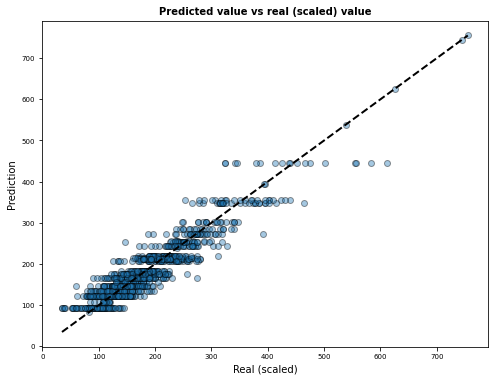

In [40]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain_scaled

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain_scaled, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real (scaled) value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real (scaled)')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)